In [1]:
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
data_dir = "/content/drive/MyDrive/Machine_learning/project/archive/Dataset"

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix


In [6]:
# data_dir = "Dataset"  # মূল ডেটাসেট ফোল্ডার  <-- This line is causing the error
data_dir = "/content/drive/MyDrive/Machine_learning/project/archive/Dataset"  # Update to the correct path to your dataset folder
img_size = (128, 128)  # ইমেজ সাইজ
batch_size = 32

# ডেটা অগমেন্টেশন (প্রশিক্ষণের জন্য)
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,           # পিক্সেলের মান 0-1 স্কেলে আনা
    rotation_range=20,           # ইমেজ ঘোরানো
    width_shift_range=0.2,       # অনুভূমিক স্থানান্তর
    height_shift_range=0.2,      # উল্লম্ব স্থানান্তর
    shear_range=0.2,             # শিয়ারিং
    zoom_range=0.2,              # জুম
    horizontal_flip=True,        # অনুভূমিক ফ্লিপ
    validation_split=0.2         # ২০% ডেটা যাচাইকরণের জন্য রাখা
)

# প্রশিক্ষণ ডেটা লোড করা
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # একাধিক শ্রেণীর জন্য ক্যাটেগরিক্যাল
    subset='training'
)

# যাচাইকরণের ডেটা লোড করা
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')  # ক্লাসের সংখ্যা অনুযায়ী আউটপুট
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
history = model.fit(
    train_generator,
    epochs=10,                  # ইপোক সংখ্যা (আপনার ডেটার উপর নির্ভর করবে)
    validation_data=validation_generator
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 87s 4s/step - accuracy: 0.2464 - loss: 1.4815 - val_accuracy: 0.3500 - val_loss: 1.3825
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.2409 - loss: 1.3854 - val_accuracy: 0.3750 - val_loss: 1.3709
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.3207 - loss: 1.3709 - val_accuracy: 0.3375 - val_loss: 1.3511
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.2650 - loss: 1.3715 - val_accuracy: 0.3500 - val_loss: 1.3290
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.3535 - loss: 1.3233 - val_accuracy: 0.4375 - val_loss: 1.2759
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.4341 - loss: 1.2787 - val_accuracy: 0.5125 - val_loss: 1.1440
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.3897 - loss: 1.3543 - val_accuracy: 0.4125 - val_loss: 1.2127
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.3886 - loss: 1.2392 - val_accuracy: 0.4625 - val_loss: 1.1775
Epo

In [9]:
# যাচাইকরণ ডেটাতে মডেলের পারফরম্যান্স
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")

# ক্লাসিফিকেশন রিপোর্ট এবং কনফিউশন ম্যাট্রিক্স
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

print("Classification Report:")
print(classification_report(validation_generator.classes, y_pred, target_names=list(validation_generator.class_indices.keys())))

print("Confusion Matrix:")
print(confusion_matrix(validation_generator.classes, y_pred))


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4500 - loss: 1.1093
Validation Loss: 1.1126, Validation Accuracy: 0.4625
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
Classification Report:
              precision    recall  f1-score   support

         Bus       0.26      0.45      0.33        20
         Car       0.00      0.00      0.00        20
       Truck       0.00      0.00      0.00        20
  motorcycle       0.32      0.65      0.43        20

    accuracy                           0.28        80
   macro avg       0.14      0.28      0.19        80
weighted avg       0.14      0.28      0.19        80

Confusion Matrix:
[[ 9  0  0 11]
 [11  0  1  8]
 [10  1  0  9]
 [ 5  2  0 13]]


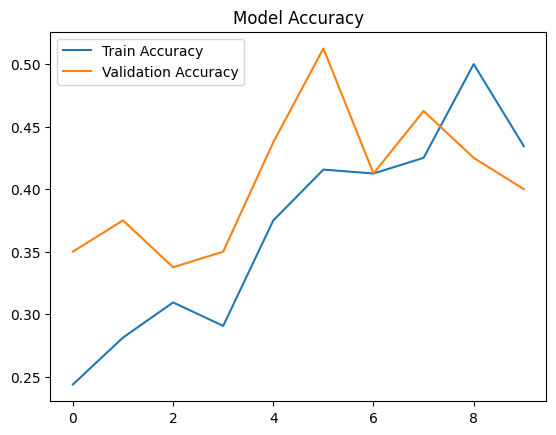

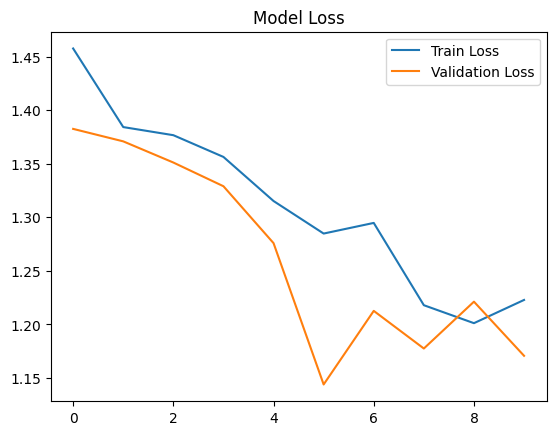

In [10]:
# ট্রেনিং এবং যাচাইকরণ সঠিকতা
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# ট্রেনিং এবং যাচাইকরণ লস
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()
